<a href="https://colab.research.google.com/github/pungji01/dataAnalysis/blob/main/3_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%9A%8C%EA%B7%80_1_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0_%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실습] 가격 예측

### #그래프에서 한글사용하는 방법
- **(코랩에서)한글폰트 설치하기**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>세션 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,099 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

- **한글 폰트 지정하기**

In [1]:
# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'NanumGothic',
                     'font.size': 12,
                     'figure.figsize': (10, 5),
                     'axes.unicode_minus':  False }) # 폰트 설정

---



# [실습] : Scikit-learn 선형 회귀로 주택가격 예측하기

## 1.데이터 준비하기
    - https://www.kaggle.com/altavish/boston-housing-dataset?select=HousingData.csv


In [2]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


| 필드명 | 설명 | 값 종류 |
|------|------|------|
|**CRIM** |자치시(town)별 1인당 범죄율 |	|
|ZN |25,000평방 피크를 초과하는 거주지역의 비율  |	|
|INDUS |비소매상업지역이 점유하고 있는 토지의 비율  |	|
|CHAS |찰스강 인접여부  |0=No, 1=Yes	|
|NOX |10ppm당 농축 일산화질소  |	|
|RM |주택 1가구당 평균 방의 개수  |	|
|AGE |1940년 이전에 건축된 소유주택의 비율  |	|
|DIS |5개의 보스턴 직업센터까지의 접근성 지수  |	|
|RAD |방사형 도로까지의 접근성 지수  |	|
|TAX |10,000 달러 당 재산세율  |	|
|PTRATIO |자치시(town)별 학생/교사 비율  |	|
|B |1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율  |	|
|LSTAT |모집단의 하위계층의 비율(%)  |	|
|MEDV |본인 소유의 주택가격(중앙값) (단위: $1,000)  |	|

## 2.데이터 전처리

### 2-1. 기본 정보 확인


- 데이터 요약정보

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


* 불 필요한 컬럼 삭제
    - Target(종속변수) : 주택가격
    - Feature(독립변수) : 여러 항목

In [4]:
# 불필요한 컬럼 삭제
df.drop(['CHAS','RAD','B','LSTAT'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      486 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    int64  
 8   PTRATIO  506 non-null    float64
 9   MEDV     506 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 39.7 KB


### 2-2. 시각화

- 종속변수 탐색

In [5]:
df['MEDV'].info()
df['MEDV'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

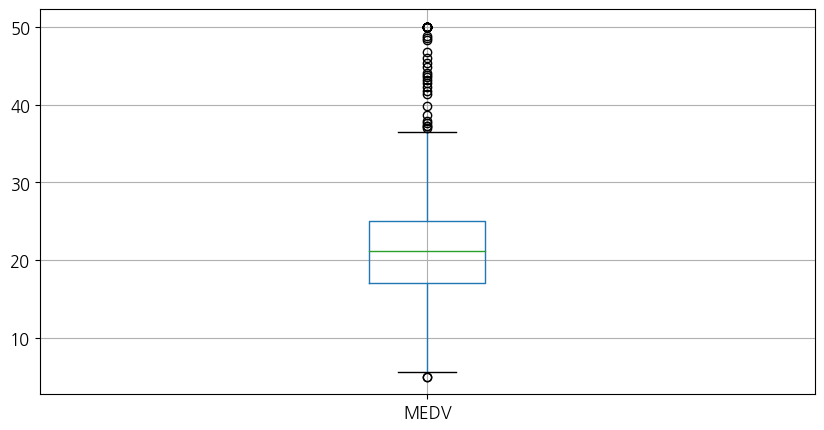

In [6]:
# boxplot
df.boxplot(column=['MEDV'])   # Pandas
# plt.boxplot(df['MEDV'])       # matplotlib
plt.show()

- 독립변수 탐색

<ipython-input-7-de88f0a6bdce>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[cols].hist(ax=ax)


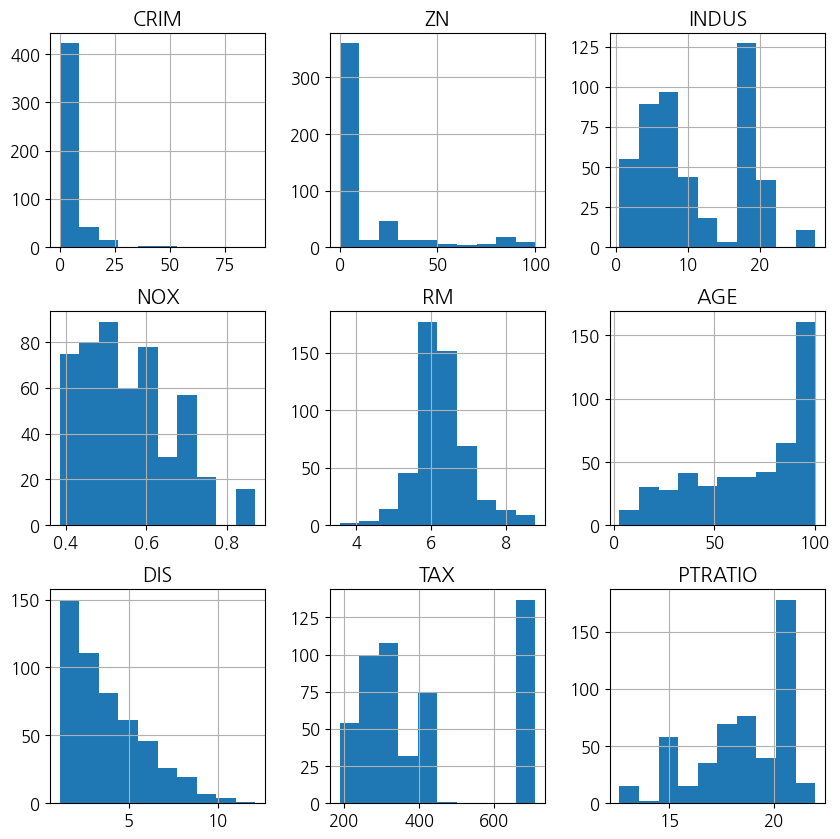

In [7]:
#[추가] 독립 변수의 분포
cols = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO']

fig = plt.figure(figsize=(10,10))
ax = fig.gca()  # 현재 값을 X축으로 Axes 생성

df[cols].hist(ax=ax)
plt.show()

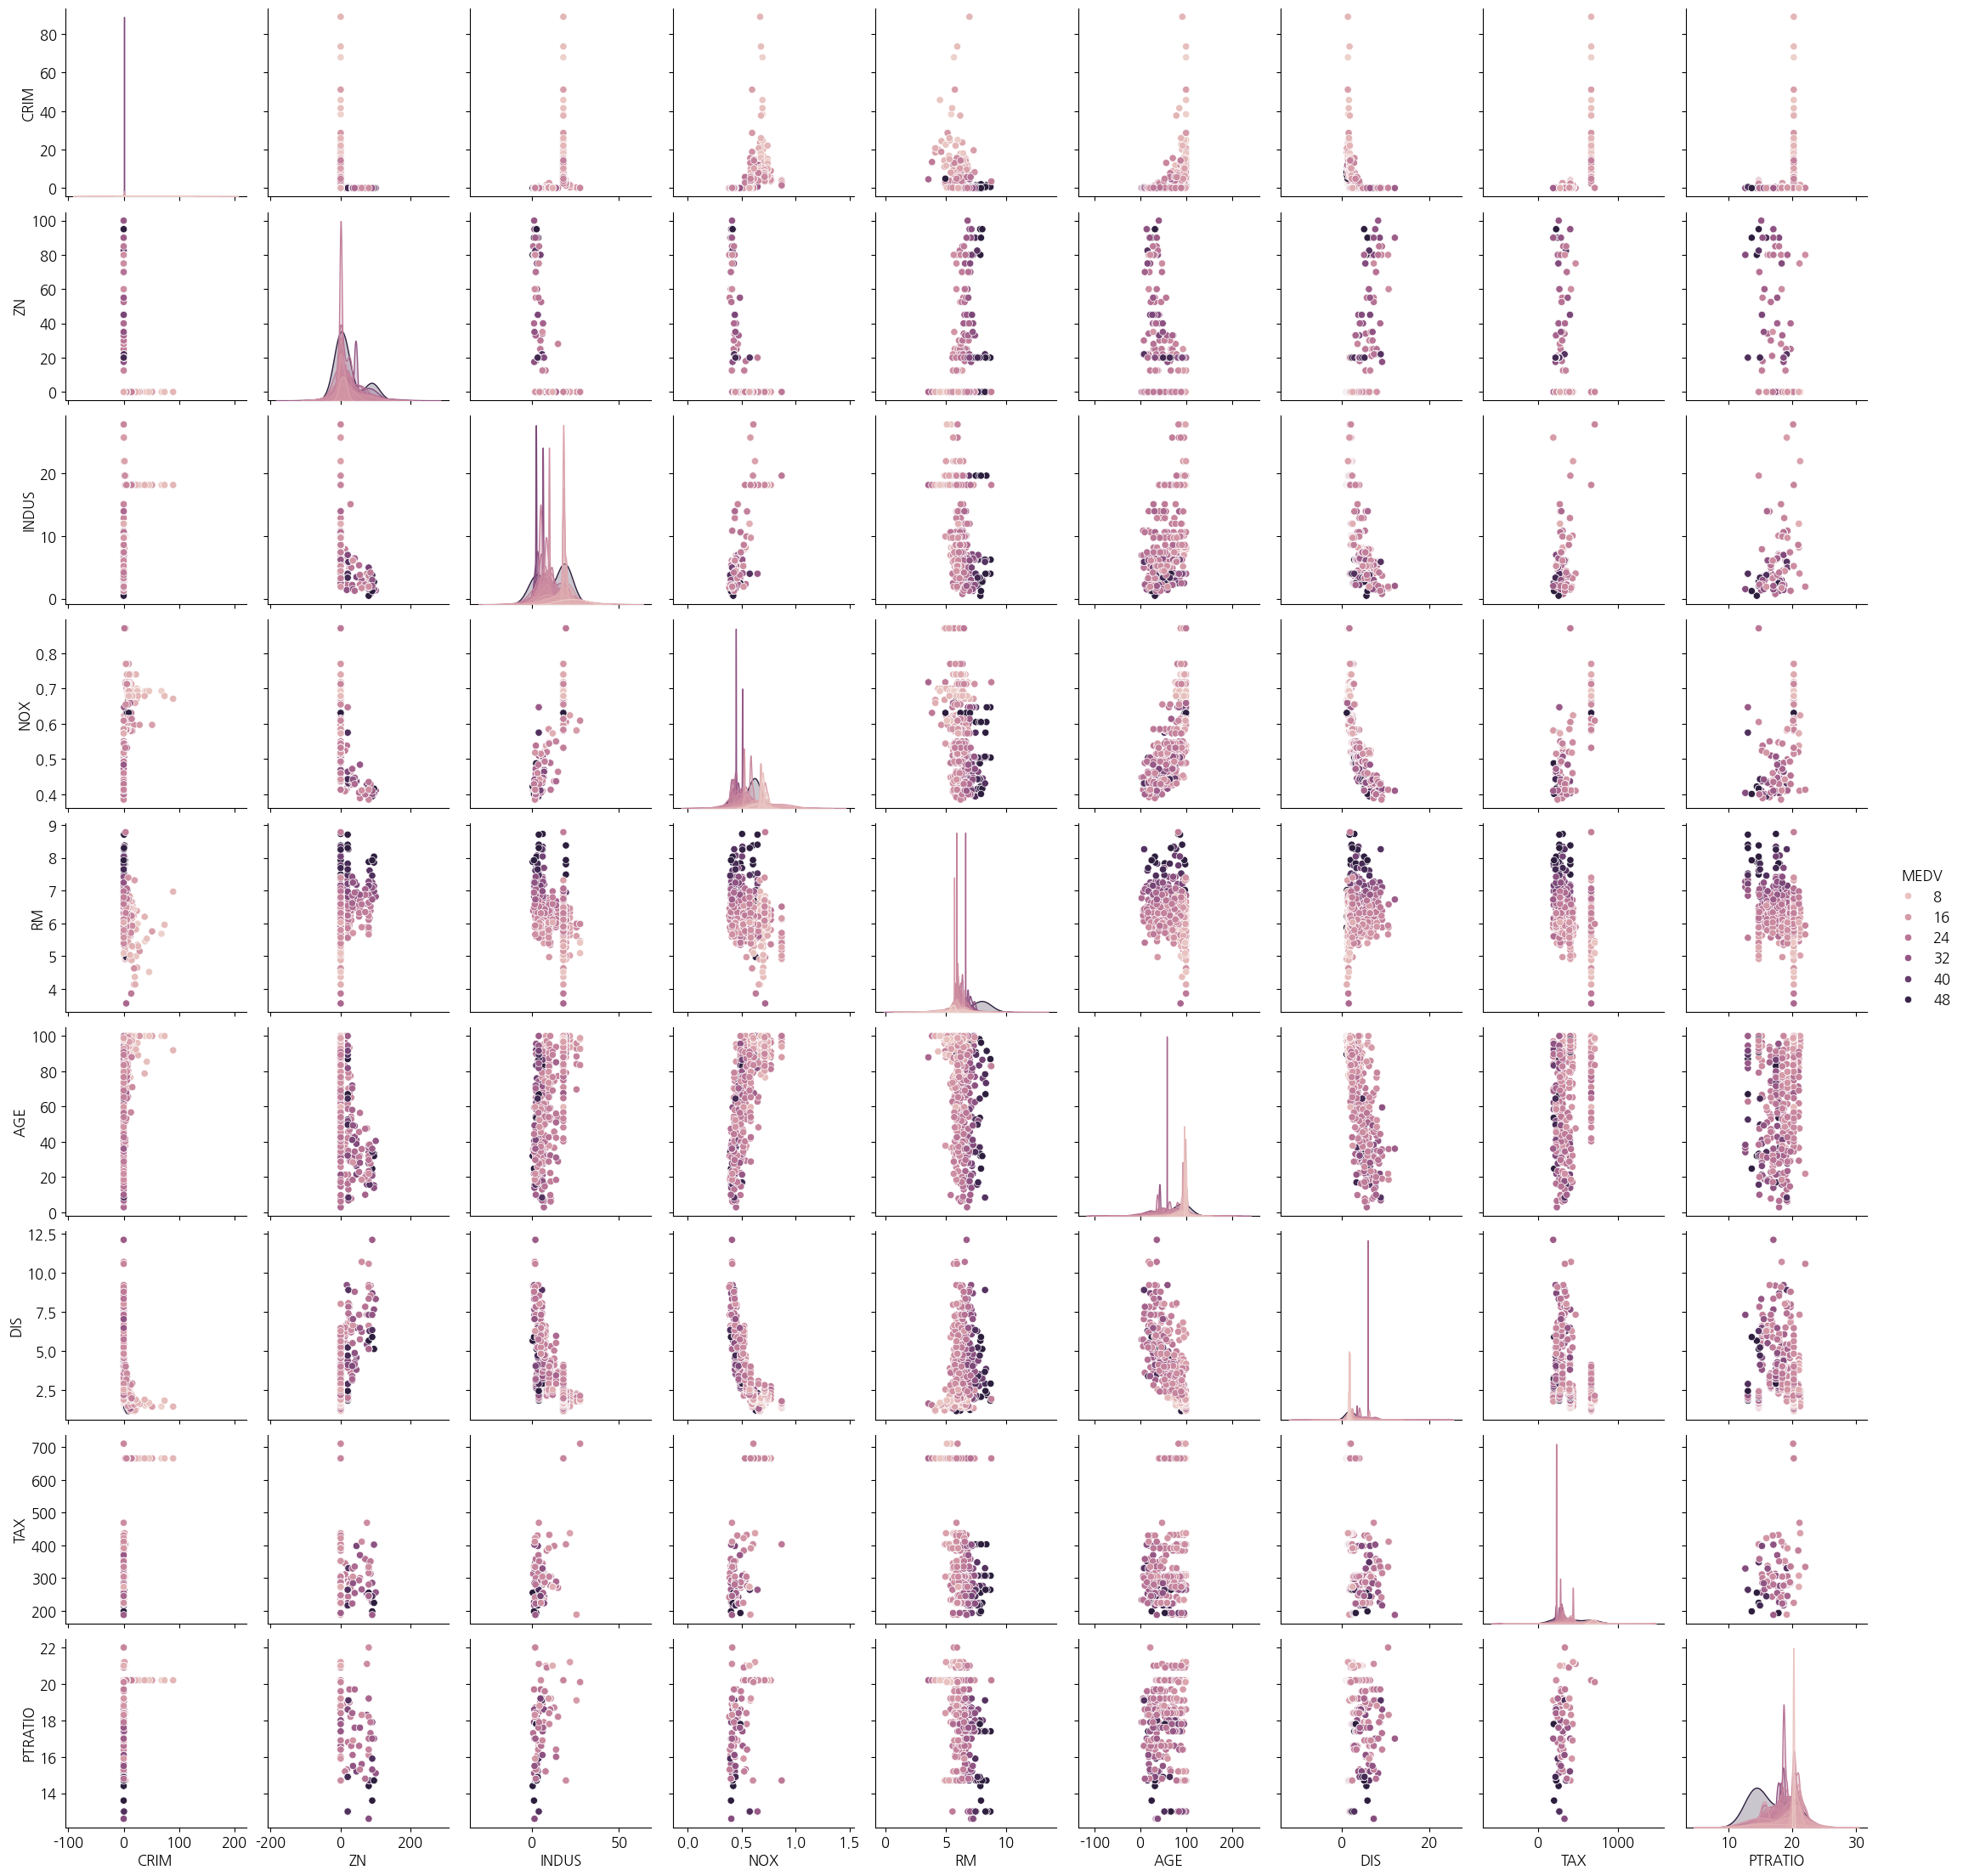

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='MEDV')
plt.show()

* 상관관계 탐색 : 종속변수와 독립변수간
    - 피어슨 상관 계수는 코시-슈바르츠 부등식에 의해 +1과 -1 사이의 값을 가진다.

In [9]:
# Pearson 상관계수
df.corr(method='pearson')

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
CRIM,1.000000,-0.191178,0.401863,0.417130,-0.219150,0.354342,-0.374166,0.580595,0.281110,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.513704,0.320800,-0.563801,0.656739,-0.312371,-0.414046,0.373136
INDUS,0.401863,-0.531871,1.000000,0.764866,-0.390234,0.638431,-0.711709,0.731055,0.390954,-0.481772
NOX,0.417130,-0.513704,0.764866,1.000000,-0.302188,0.731548,-0.769230,0.668023,0.188933,-0.427321
RM,-0.219150,0.320800,-0.390234,-0.302188,1.000000,-0.247337,0.205246,-0.292048,-0.355501,0.695360
AGE,0.354342,-0.563801,0.638431,0.731548,-0.247337,1.000000,-0.744844,0.509114,0.269226,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.769230,0.205246,-0.744844,1.000000,-0.534432,-0.232471,0.249929
TAX,0.580595,-0.312371,0.731055,0.668023,-0.292048,0.509114,-0.534432,1.000000,0.460853,-0.468536
PTRATIO,0.281110,-0.414046,0.390954,0.188933,-0.355501,0.269226,-0.232471,0.460853,1.000000,-0.507787
MEDV,-0.391363,0.373136,-0.481772,-0.427321,0.695360,-0.394656,0.249929,-0.468536,-0.507787,1.000000


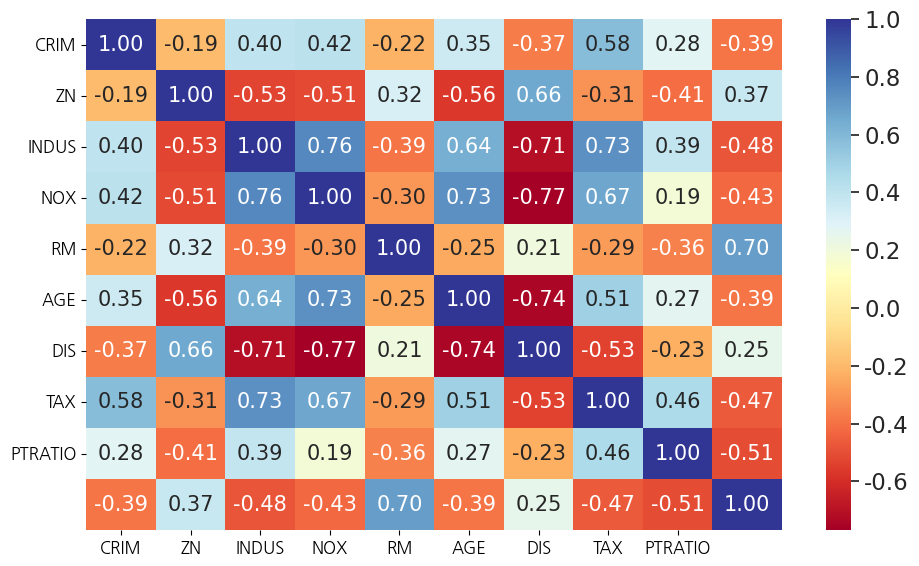

In [10]:
#[추가] 상관계수를 Heatmap으로 표현
fig = plt.figure(figsize=(10,6))
ax = fig.gca()

import seaborn as sns
sns.set(font_scale=1.5)  # heatmap안의 font-size
heatmap = sns.heatmap(df.corr(), annot=True,
                      fmt='.2f',annot_kws={'size':15},
                     yticklabels=cols, xticklabels=cols, ax=ax, cmap='RdYlBu')
plt.tight_layout()
plt.show()

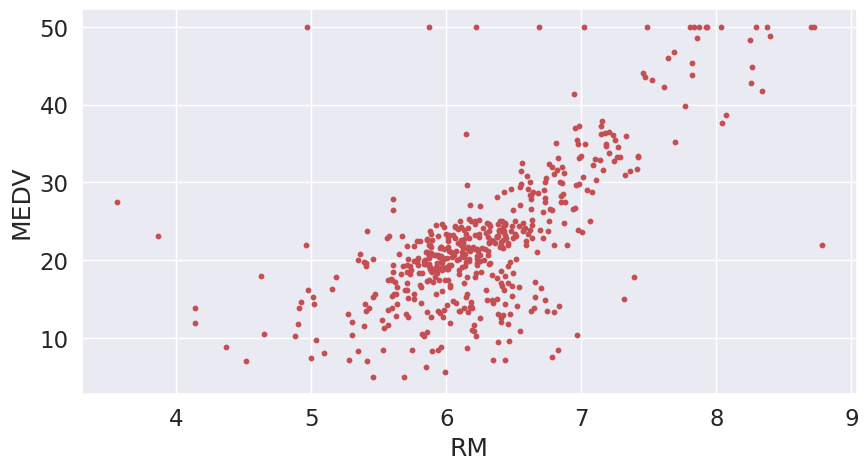

In [11]:
# RM(방개수) 와 MEDV(주택가격) 간의 그래프
X, Y = df['RM'], df['MEDV']
plt.scatter(X, Y, color ='r', s= 10)
# sns.scatterplot(data=df, x='RM', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

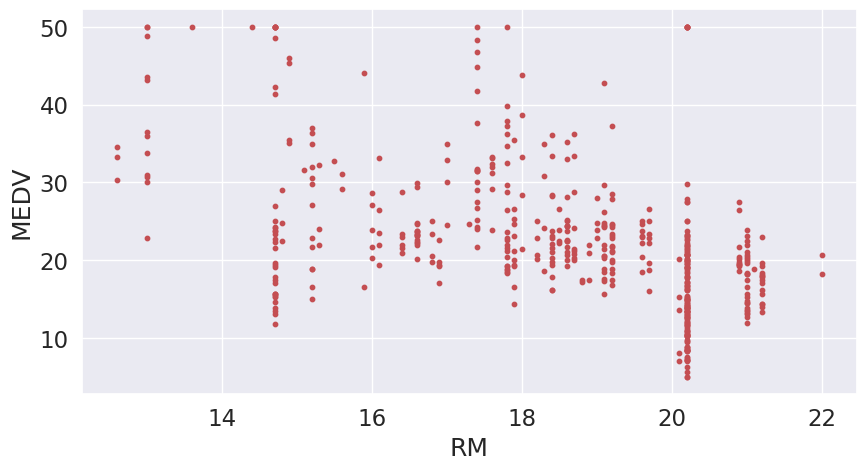

In [12]:
# PTRATIO(학교/교사비율) 와 MEDV(주택가격) 간의 그래프
X, Y = df['PTRATIO'], df['MEDV']
plt.scatter(X, Y, color ='r', s= 10)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

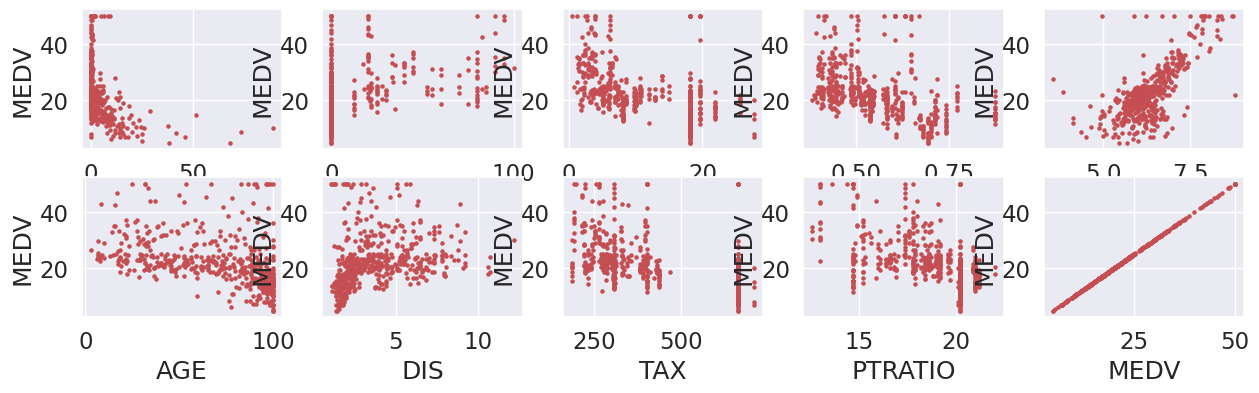

In [13]:
# 여러 개 그래프 그리기
plt.figure(figsize=(15, 4))   # 그림 크기를 인치단위로 표시
p = 1
for col in df.columns:
    X, Y = df[col], df['MEDV']
    plt.subplot(2,5,p)   # 2 x 5 행렬로 이뤄진 하위 그래프에서 p에 따라 위치를 지정
    plt.scatter(X, Y, color ='r', s=5)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    p += 1
plt.show()

### 2-3.데이터 처리

#### 1) 결측치 처리

In [14]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
NOX         0
RM          0
AGE        20
DIS         0
TAX         0
PTRATIO     0
MEDV        0
dtype: int64

In [15]:
df[['CRIM', 'ZN', 'INDUS', 'AGE']].describe()

,CRIM,ZN,INDUS,AGE
count,486.000000,486.000000,486.000000,486.000000
mean,3.611874,11.211934,11.083992,68.518519
std,8.720192,23.388876,6.835896,27.999513
min,0.006320,0.000000,0.460000,2.900000
25%,0.081900,0.000000,5.190000,45.175000
50%,0.253715,0.000000,9.690000,76.800000
75%,3.560263,12.500000,18.100000,93.975000
max,88.976200,100.000000,27.740000,100.000000


- 결측치:'CRIM', 'ZN', 'INDUS', 'AGE' (중앙값으로 대체)

In [16]:
df['CRIM']  = df['CRIM'].fillna(df['CRIM'].median())
df['ZN']    = df['ZN'].fillna(df['ZN'].median())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].median())
df['AGE']   = df['AGE'].fillna(df['AGE'].median())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
MEDV       0
dtype: int64

#### 2) 정규화 & 표준화

In [17]:
from sklearn.preprocessing import StandardScaler

# 표준화 하기
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,-0.405592,0.314369,-1.301706,-0.144217,0.413672,-0.132771,0.140214,-0.666608,-1.459000,24.0
1,-0.403140,-0.468160,-0.591052,-0.740262,0.194274,0.366141,0.557160,-0.987329,-0.303094,21.6
2,-0.403142,-0.468160,-0.591052,-0.740262,1.282714,-0.282080,0.557160,-0.987329,-0.303094,34.7
3,-0.402549,-0.468160,-1.321115,-0.835284,1.016303,-0.839258,1.077737,-1.106115,0.113032,33.4
4,-0.398265,-0.468160,-1.321115,-0.835284,1.228577,-0.533356,1.077737,-1.106115,0.113032,36.2


## 3.모델

### 3-1. 학습용 데이터 준비

In [18]:
feature = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO']
target = ['MEDV']
X = df[feature]
Y = df[target]

### 3-2. 학습용, 테스트 데이터 분리하기

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 9) (102, 9)
(404, 1) (102, 1)


### 3-3.모델 훈련 및 테스트

In [20]:
from sklearn.linear_model import LinearRegression

# 모델(회귀) : 선형회귀
model = LinearRegression()

# 모델 훈련(학습)
model.fit(X_train, y_train)

# 회귀 모델의 계수: weight, bias
print(f'weight: {model.coef_}')
print(f'bias: {model.intercept_}')

# 학습모델(lr)을 통해 예측 : x만 입력
y_pred = model.predict(X_test)
# print(y_test)
# print(y_pred)


weight: [[-1.3799785   0.91787    -0.76360135 -2.46216963  4.02660339 -1.42880462
  -3.42137232  0.11017487 -2.12958036]]
bias: [22.5888014]


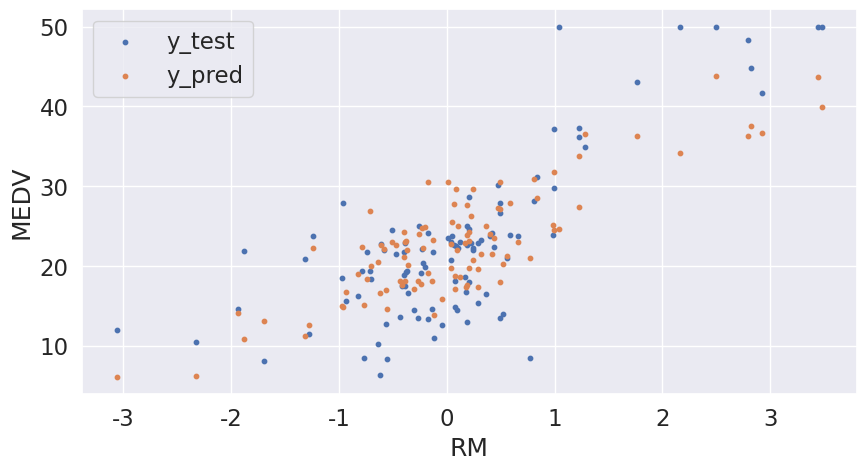

In [23]:
# RM(방개수) 와 MEDV(주택가격) 간의 그래프
plt.scatter(X_test['RM'], y_test, s= 10, label='y_test')
plt.scatter(X_test['RM'], y_pred, s= 10, label='y_pred')
# sns.scatterplot(data=df, x='RM', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()

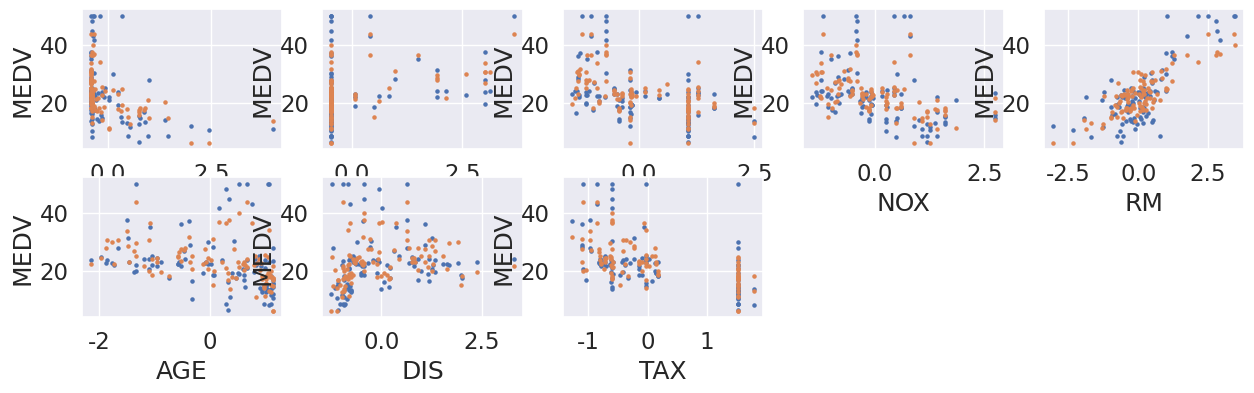

In [22]:
cols = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX']
plt.figure(figsize=(15, 4))   # 그림 크기를 인치단위로 표시
p = 1
for col in cols:
    plt.subplot(2,5,p)   # 2 x 5 행렬로 이뤄진 하위 그래프에서 p에 따라 위치를 지정
    plt.scatter(X_test[col], y_test,  s=5)
    plt.scatter(X_test[col], y_pred,  s=5)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    p += 1
plt.show()

### 3-4.모델 평가(정확도 측정)
- RMSE(Root Mean Square Error):평균 제곱 오차
- R2(R-squared): 결정 계수 :  예측 값의 분산/실제값의 분산, 1 일때 설명력이 높다, 절대 지표로 사용

In [24]:
# 정확도 측정 , RMSE, 상대 지표(값이 작을수록 정확도가 크다)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test ,y_pred)
rmse = np.sqrt(mse)   # 제곱근
print('RMSE:',rmse)   # RMSE: 6.603071389222561

# R2(R-squared), 결정 계수 :  예측 값의 분산/실제값의 분산, 1 일때 설명력이 높다, 절대 지표로 사용
r2 = r2_score(y_test ,y_pred)
print('r2_score:',r2) # 0.48352545599133423

RMSE: 5.755517630863248
r2_score: 0.664809691136165


- 실제값과 예측값의 비교 그래프

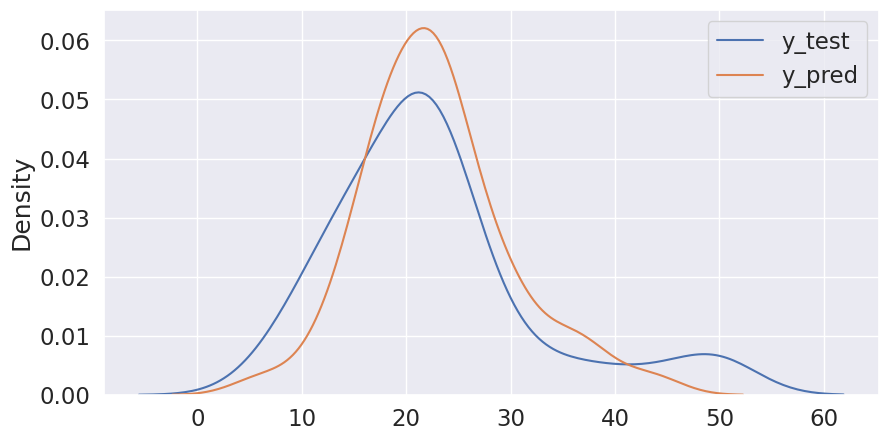

In [25]:
#실제값과 예측값의 비교 그래프
import warnings
warnings.filterwarnings('ignore')

sns.distplot(y_test, hist=False, label='y_test')
sns.distplot(y_pred, hist=False, label='y_pred')
plt.legend()
plt.plot()
plt.show()

-----

## THE END